In [ ]:
!pip install PyDrive

In [2]:
import os
import mykeys

project_name = 'CH16_Agent'

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = project_name
os.environ["LANGCHAIN_API_KEY"] = mykeys.get_key('LANG')
os.environ["LANGCHAIN_HUB_API_KEY"] = mykeys.get_key('LANG')
os.environ["OPENAI_API_KEY"] = mykeys.get_key('GPT')
os.environ["GOOGLE_API_KEY"] = mykeys.get_key('GOO')
os.environ["HUGGINGFACEHUB_API_TOKEN"] = mykeys.get_key('HF')
os.environ["UPSTAGE_API_KEY"] = mykeys.get_key('UP')
os.environ["COHERE_API_KEY"] = mykeys.get_key('COH')
os.environ["JINA_API_KEY"] = mykeys.get_key('JINA')
os.environ["ANTHROPIC_API_KEY"] = mykeys.get_key('ANT')
os.environ["DEEPL_API_KEY"] = mykeys.get_key('DEEP')
os.environ["TAVILY_API_KEY"] = mykeys.get_key('TAV')
os.environ["TOGETHER_API_KEY"] = mykeys.get_key('TOG')

아래 링크를 복사하여 웹 브라우저에 붙여넣으세요.
https://accounts.google.com/o/oauth2/auth?client_id=35726703810-4v13dfqmilhgv6shlc3cv9i3ktuh73j1.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code
Authentication successful.


In [3]:
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith(project_name)

LangSmith 추적을 시작합니다.
[프로젝트명]
CH16_Agent


In [ ]:
from langchain_teddynote import logging

# set_enable=False 로 지정하면 추적을 하지 않습니다.
logging.langsmith(project_name, set_enable=False)

CH16 에이전트(Agent)

04. Claude, Gemini, Ollama, Together.ai 를 활용한 Agent

In [4]:
from langchain.tools import tool
from typing import List, Dict
from langchain_teddynote.tools import GoogleNews


# 도구 정의
@tool
def search_news(query: str) -> List[Dict[str, str]]:
    """Search Google News by input keyword"""
    news_tool = GoogleNews()
    return news_tool.search_by_keyword(query, k=5)


print(f"도구 이름: {search_news.name}")
print(f"도구 설명: {search_news.description}")


도구 이름: search_news
도구 설명: Search Google News by input keyword


In [5]:
# tools 정의
tools = [search_news]


In [6]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.agents import create_tool_calling_agent

# 프롬프트 생성
# 프롬프트는 에이전트에게 모델이 수행할 작업을 설명하는 텍스트를 제공합니다. (도구의 이름과 역할을 입력)
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. "
            "Make sure to use the `search_news` tool for searching keyword related news.",
        ),
        ("placeholder", "{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)


In [18]:
!pip install langchain-ollama


In [22]:
from langchain_anthropic import ChatAnthropic
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_openai import ChatOpenAI
from langchain_ollama import ChatOllama
import os

# GPT-4o-mini
gpt = ChatOpenAI(model="gpt-4.1")

# Claude-3-5-sonnet
claude = ChatAnthropic(model="claude-3-7-sonnet-latest", temperature=0)

# Gemini-1.5-pro-latest
gemini = ChatGoogleGenerativeAI(model="gemini-2.5-flash", temperature=0)

# Llama-3.1-70B-Instruct-Turbo
llama = ChatOpenAI(
    base_url="https://api.together.xyz/v1",
    api_key=os.environ["TOGETHER_API_KEY"],
    model="meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo",
)

# Llama-3.1
ollama = ChatOllama(model="llama3.1:latest", temperature=0)


In [23]:
# Agent 생성
gpt_agent = create_tool_calling_agent(gpt, tools, prompt)
claude_agent = create_tool_calling_agent(claude, tools, prompt)
gemini_agent = create_tool_calling_agent(gemini, tools, prompt)
llama_agent = create_tool_calling_agent(llama, tools, prompt)
ollama_agent = create_tool_calling_agent(ollama, tools, prompt)


In [10]:
from langchain.agents import AgentExecutor

# gpt_agent 실행
agent_executor = AgentExecutor(
    agent=gpt_agent,
    tools=tools,
    verbose=True,
    handle_parsing_errors=True,
)

result = agent_executor.invoke({"input": "AI 투자와 관련된 뉴스를 검색해 주세요."})

print("Agent 실행 결과:")
print(result["output"])




> Entering new AgentExecutor chain...

Invoking: `search_news` with `{'query': 'AI 투자'}`


[{'url': 'https://news.google.com/rss/articles/CBMiiAFBVV95cUxQRXppY1BrMHk0LTJYS2Nzd0pGZlpjTG1sWFd2MXZtcEp1NGVaY2JEcm5XZnlwMEV4Z2VzN0g5ajdTMEl5dUlOYUhsLUtSZEcxVWNIeUlEVzBjRVBtRzB2R2JqOEJiNVozbEpVMDJhRTlJXzNYNlNxbEJKbUlxYlRTakdabGo0aXg0?oc=5', 'content': '[투자노트] AI 거품 꼈다지만… 투자 기회는 남아 있다 - Chosun Biz'}, {'url': 'https://news.google.com/rss/articles/CBMiakFVX3lxTE9WOWlzVU9KODhqbk5CeFY2VHpWTmF3R1B6cG1kSU12dm9CbUd2NXRLb0h0UUFiZVRncWxsVG1PQUJoNWFrYmhfbFdmU2Y0MkVqbDgxMUxEOHVkQ3EtWkU2MDZ3Z0taLXNjdFE?oc=5', 'content': '오픈AI, SPV·암호화폐 등 우회 투자 금지..."주식 양도도 금지할 것" - AI타임스'}, {'url': 'https://news.google.com/rss/articles/CBMiZEFVX3lxTE1rMUJUc1JYTWNjV19UMDd1V3IyaWlZLTFOQ0VacnNZbWQ1dXdBMDBsVzBGQmlGMl9tVTZMTG42N3NwbjdBRlBDbDhOcmVzMmxpU1FhOHpaT2c5Um1PMHRUbXpZZmo?oc=5', 'content': '“AI 100조 투자 공언했지만”…소방청 규제로 데이터센터 건립부터 ‘발목’ - 디지털데일리'}, {'url': 'https://news.google.com/rss/articles/CBMiiAFBVV95cUxOLWZhRTNib1RwVGZ

In [11]:
def execute_agent(llm, tools, input_text, label):
    agent = create_tool_calling_agent(llm, tools, prompt)
    executor = AgentExecutor(agent=agent, tools=tools, verbose=False)
    result = executor.invoke({"input": input_text})
    print(f"[{label}] 결과입니다.")
    if isinstance(result["output"], list) and len(result["output"]) > 0:
        for item in result["output"]:
            if "text" in item:
                print(item["text"])
    elif isinstance(result["output"], str):
        print(result["output"])
    else:
        print(result["output"])


In [12]:
query = (
    "AI 투자와 관련된 뉴스를 검색하고, 결과를 Instagram 게시글 형식으로 작성해 주세요."
)


In [13]:
# gpt
execute_agent(gpt, tools, query, "gpt")


[gpt] 결과입니다.
아래는 AI 투자 관련 주요 뉴스 소식들을 바탕으로 작성한 Instagram 게시글 예시입니다.

---

📈 #AI투자 소식 모음! 2024년 최신 동향 🚀

🤖 1. AI 투자, 아직 기회는 남아 있다!
AI 버블 논란이 많지만, 새로운 투자 기회가 계속 생기고 있다는 분석이 나왔어요. 미래 산업의 키워드는 여전히 'AI'! (출처: Chosun Biz)

🛑 2. 오픈AI, 투자 방침 강화
오픈AI가 SPV·암호화폐 등 우회 투자와 주식 양도를 전면 금지한다고 밝혔어요. AI 산업 투명성을 강화하려는 움직임입니다. (출처: AI타임스)

🏢 3. AI 100조 투자… 규제가 발목 잡나?
총 100조원 투자를 공언했지만, 데이터센터 건립 등 여러 규제로 인해 현실적인 난관도 크다는 소식입니다. (출처: 디지털데일리)

💸 4. 소프트뱅크, AI 랠리 가속화
소프트뱅크가 인텔 투자와 OpenAI 협력을 확대하며 기술 경쟁력을 높이고 있어요. 글로벌 자본의 AI 집중 투자 트렌드! (출처: 글로벌이코노믹)

💡 5. AI 펀드, 옥석 가리기 돌입!
AI 펀드가 쏟아지는 가운데, 어떤 펀드가 좋은지 신중한 선택이 필요하다는 전문가 의견입니다. (출처: 딜사이트)

—
#AI #AI투자 #AI뉴스 #인공지능 #투자뉴스 #트렌드 #TechNews

궁금한 AI 투자 소식, 댓글로 남겨주세요! 💬👇

---

이렇게 Instagram 게시글 스타일로 뉴스 요약을 제작해보았습니다. 이미지는 최신 AI 기술, 투자 그래프, 글로벌 기업 로고 등을 활용하면 더욱 효과적입니다!


In [14]:
# claude
execute_agent(claude, tools, query, "claude")


[claude] 결과입니다.
# 🚀 AI 투자 트렌드: 거품 속에서 찾는 진짜 기회 💰

오늘의 AI 투자 소식을 한눈에! 최신 트렌드와 투자 인사이트를 확인하세요 👇

---

## 📈 AI 거품 속에서도 투자 기회는 여전히 존재!
"AI 거품이 꼈다고 하지만... 투자 기회는 남아 있다"
현재 AI 시장이 과열되었다는 우려에도 불구하고, 선별적인 투자 기회는 여전히 존재합니다. 장기적 관점에서 실질적 가치를 창출하는 AI 기업에 주목해보세요.

## 🔒 오픈AI, 투자 규제 강화
오픈AI가 SPV(특수목적회사)와 암호화폐 등을 통한 우회 투자를 금지하고 주식 양도까지 제한하는 강력한 규제를 시행합니다. AI 기업의 투명성과 윤리적 운영에 대한 중요성이 커지고 있어요.

## 🏗️ AI 인프라 구축의 현실적 장벽
"AI 100조 투자 공언했지만..." 소방청 규제로 데이터센터 건립부터 어려움을 겪고 있다는 소식입니다. 거대한 AI 투자 계획도 현실적인 규제와 인프라 문제에 직면하고 있습니다.

## 🌐 소프트뱅크, AI 붐 타고 전략적 투자 확대
소프트뱅크가 AI 붐을 타고 인텔 투자와 OpenAI 협력 등 공격적인 투자 전략을 펼치고 있습니다. 글로벌 테크 기업들의 AI 생태계 구축 경쟁이 치열해지고 있어요.

## 💼 AI 펀드 시장, 옥석가리기 시작
쏟아지는 AI 펀드 속에서 투자자들의 옥석가리기가 시작되었습니다. 실질적인 기술력과 비즈니스 모델을 갖춘 AI 기업을 찾는 안목이 중요해지고 있습니다.

---

#AI투자 #인공지능투자 #테크투자 #투자트렌드 #AI펀드 #오픈AI #소프트뱅크 #데이터센터 #투자인사이트 #기술주

여러분은 어떤 AI 기업에 관심이 있으신가요? 댓글로 공유해주세요! 👇✨


In [15]:
# gemini
execute_agent(gemini, tools, query, "gemini")


[gemini] 결과입니다.
✨AI 투자, 지금이 기회일까?✨

최근 AI 기술의 발전과 함께 'AI 투자'에 대한 관심이 뜨겁습니다. 하지만 일각에서는 AI 거품에 대한 우려도 나오고 있는데요. 과연 AI 투자는 어떤 방향으로 흘러가고 있을까요?

🔍 **주요 뉴스 요약:**
*   **"AI 거품 꼈다지만… 투자 기회는 남아 있다"** - 여전히 AI 관련 투자 기회는 존재한다는 분석입니다.
*   **"오픈AI, SPV·암호화폐 등 우회 투자 금지"** - 오픈AI는 우회 투자를 금지하며 투명성을 강조하고 있습니다.
*   **"소프트뱅크, 'AI 붐' 타고 기술 랠리… 인텔 투자·OpenAI 협력 '승부수'"** - 소프트뱅크는 AI 분야에 적극적으로 투자하며 승부수를 띄우고 있습니다.
*   **"쏟아지는 AI 펀드, 옥석가리기 시작됐다"** - 다양한 AI 펀드들이 출시되면서 투자자들의 신중한 선택이 중요해지고 있습니다.

AI 투자는 미래를 이끌어갈 핵심 분야임은 분명하지만, 신중한 접근과 옥석 가리기가 필요한 시점입니다. 여러분은 AI 투자에 대해 어떻게 생각하시나요? 🤔

#AI투자 #인공지능 #투자 #주식 #미래기술 #재테크 #AI펀드 #오픈AI #소프트뱅크


In [16]:
# llama3.1 70B (Together.ai)
execute_agent(
    llama,
    tools,
    "Search AI related news and write it in Instagram post format",
    "llama3.1 70B",
)


[llama3.1 70B] 결과입니다.
<|python_tag|>{"name": "search_news", "parameters": {"query": "AI"}}


In [25]:
from langchain_community.chat_models import ChatOllama
from langchain_community.llms import Ollama

# 올바른 Ollama 클라이언트 객체를 생성합니다.
ollama_client = Ollama(model="llama3.1")

# ChatOllama 초기화 시 client를 명시적으로 전달합니다.
# 아래 코드는 일반적인 사용 예시이며, 실제 에이전트 생성 코드에 맞게 수정해야 합니다.
chat_ollama_model = ChatOllama(model="llama3.1", client=ollama_client)

/var/folders/sj/3r49bs6178v7nfhcxh7lpzd80000gn/T/ipykernel_53870/2120130638.py:5: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  ollama_client = Ollama(model="llama3.1")
/var/folders/sj/3r49bs6178v7nfhcxh7lpzd80000gn/T/ipykernel_53870/2120130638.py:9: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  chat_ollama_model = ChatOllama(model="llama3.1", client=ollama_client)


In [28]:
# llama3.1 8B (ollama)
execute_agent(ollama, tools, query, "llama3.1(Ollama)")


AttributeError: 'FieldInfo' object has no attribute 'chat'

05. Iteration 기능과 사람 개입(Human-in-the-loop)

In [29]:
from langchain.agents import tool


@tool
def add_function(a: float, b: float) -> float:
    """Adds two numbers together."""
    return a + b


In [30]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI
from langchain.agents import create_tool_calling_agent, AgentExecutor

# 도구 정의
tools = [add_function]

# LLM 생성
gpt = ChatOpenAI(model="gpt-4.1")

# prompt 생성
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. Make sure to use the `search_news` tool for searching keyword related news.",
        ),
        ("human", "{input}"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ]
)

# Agent 생성
gpt_agent = create_tool_calling_agent(gpt, tools, prompt)

# AgentExecutor 생성
agent_executor = AgentExecutor(
    agent=gpt_agent,
    tools=tools,
    verbose=False,
    max_iterations=10,
    handle_parsing_errors=True,
)


In [32]:
# 계산할 질문 설정
question = "114.5 + 121.2 + 34.2 + 110.1 의 계산 결과는?"

# agent_executor를 반복적으로 실행
for step in agent_executor.iter({"input": question}):
    if output := step.get("intermediate_step"):
        action, value = output[0]
        if action.tool == "add_function":
            # Tool 실행 결과 출력
            print(f"\nTool Name: {action.tool}, 실행 결과: {value}")
        # 사용자에게 계속 진행할지 묻습니다.
        _continue = input("계속 진행하시겠습니다? (y/n)?:\n") or "Y"
        # 사용자가 'y'가 아닌 다른 입력을 하면 반복 중단
        if _continue.lower() != "y":
            break

# 최종 결과 출력
if "output" in step:
    print(step["output"])



Tool Name: add_function, 실행 결과: 235.7

Tool Name: add_function, 실행 결과: 380.0
114.5 + 121.2 + 34.2 + 110.1의 계산 결과는 380.0입니다.


06. Agentic RAG

In [33]:
# TavilySearchResults 클래스를 langchain_community.tools.tavily_search 모듈에서 가져옵니다.
from langchain_community.tools.tavily_search import TavilySearchResults

# TavilySearchResults 클래스의 인스턴스를 생성합니다
# k=6은 검색 결과를 6개까지 가져오겠다는 의미입니다
search = TavilySearchResults(k=6)


/var/folders/sj/3r49bs6178v7nfhcxh7lpzd80000gn/T/ipykernel_53870/1395869961.py:6: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  search = TavilySearchResults(k=6)


In [34]:
# 검색 결과를 가져옵니다.
search.invoke("판교 카카오 프렌즈샵 아지트점의 전화번호는 무엇인가요?")


[{'title': '[LangChain] 에이전트(Agent)와 도구(tools)를 활용한 지능형 검색 ...',
  'url': 'https://teddylee777.github.io/langchain/langchain-agent/',
  'content': "\x1b> Finished chain.\x1b\n답변: 판교 카카오 프렌즈샵 아지트점의 전화번호는 031-601-7225입니다. 위치는 경기도 성남시 분당구 판교역로 166, 카카오판교아지트 1층에 있습니다. 운영 시간은 평일 10:00 - 21:00, 토일 12:00 - 20:00입니다. 방문하시기 전에 운영 시간이나 기타 사항을 확인하시려면 전화로 문의하시는 것이 좋습니다. [...] \x1b> Finished chain.\x1b\n답변: 판교 카카오 프렌즈샵 아지트점의 전화번호는 031-601-7225 입니다. 매장은 경기 성남시 분당구 판교역로 166, 카카오판교아지트 1층에 위치해 있습니다. 운영 시간은 평일 10:00 - 21:00, 토일 12:00 - 20:00입니다.\n\n④ 메모리 추가하기[Permalink\n-------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n앞서 언급했듯이, 이 에이전트는 상태가 없습니다. 이는 이전 상호작용을 기억하지 않는다는 것을 의미합니다. 이에게 메모리를 부여하기 위해서는 이전 \n```plaintext\nchat_history\n```\n를 전달해야 합니다.\n\n[참고] [...] 판교아지트점 오늘 주말에 다녀왔더니, 사람이 꽤나 있었어요. \\u200b안녕하세요 오늘은 판교역 바로 앞에 있는 카카오 판교아지트, 그 안에 있는 카카오프렌즈 스토어를 다녀왔어요! 존재하지 않는 이미지입니다. 아지트 건물에 이렇게 이어져 있어요

In [35]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain.document_loaders import PyPDFLoader

# PDF 파일 로드. 파일의 경로 입력
loader = PyPDFLoader("data/SPRI_AI_Brief_2023년12월호_F.pdf")

# 텍스트 분할기를 사용하여 문서를 분할합니다.
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

# 문서를 로드하고 분할합니다.
split_docs = loader.load_and_split(text_splitter)

# VectorStore를 생성합니다.
vector = FAISS.from_documents(split_docs, OpenAIEmbeddings())

# Retriever를 생성합니다.
retriever = vector.as_retriever()


In [36]:
# 문서에서 관련성 높은 문서를 가져옵니다.
retriever.invoke("삼성전자가 개발한 생성형 AI 관련 내용을 문서에서 찾아줘")


[Document(id='87e3bd27-45f3-40eb-9019-5c62eb397d42', metadata={'producer': 'Hancom PDF 1.3.0.542', 'creator': 'Hwp 2018 10.0.0.13462', 'creationdate': '2023-12-08T13:28:38+09:00', 'author': 'dj', 'moddate': '2023-12-08T13:28:38+09:00', 'pdfversion': '1.4', 'source': 'data/SPRI_AI_Brief_2023년12월호_F.pdf', 'total_pages': 23, 'page': 12, 'page_label': '13'}, page_content='SPRi AI Brief |  \n2023-12 월호\n10삼성전자 , 자체 개발 생성 AI ‘삼성 가우스 ’ 공개\nn삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 \nAI 모델 ‘삼성 가우스 ’를 공개\nn삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로 , 온디바이스 작동이 가능한 \n삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유KEY Contents\n£언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스 , 온디바이스 작동 지원\nn삼성전자가 2023 년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 \n‘삼성 가우스 ’를 최초 공개\n∙정규분포 이론을 정립한 천재 수학자 가우스 (Gauss) 의 이름을 본뜬 삼성 가우스는 다양한 상황에 \n최적화된 크기의 모델 선택이 가능\n∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며 , \n온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유\n∙삼성전자는 삼성 가우스를 활용한 온디바이스 AI 기술도 소개했으며 , 생성 AI 모델을 다양한 제품에 \n단계적으로 탑재

In [37]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    name="pdf_search",  # 도구의 이름을 입력합니다.
    description="use this tool to search information from the PDF document",  # 도구에 대한 설명을 자세히 기입해야 합니다!!
)


In [38]:
# tools 리스트에 search와 retriever_tool을 추가합니다.
tools = [search, retriever_tool]


In [39]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

# LLM 정의
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# Prompt 정의
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. "
            "Make sure to use the `pdf_search` tool for searching information from the PDF document. "
            "If you can't find the information from the PDF document, use the `search` tool for searching information from the web.",
        ),
        ("placeholder", "{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)


In [40]:
from langchain.agents import create_tool_calling_agent

# tool calling agent 생성
agent = create_tool_calling_agent(llm, tools, prompt)


In [42]:
from langchain.agents import AgentExecutor

# AgentExecutor 생성
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)


In [43]:
from langchain_teddynote.messages import AgentStreamParser

# 각 단계별 출력을 위한 파서 생성
agent_stream_parser = AgentStreamParser()


In [44]:
# 질의에 대한 답변을 스트리밍으로 출력 요청
result = agent_executor.stream(
    {"input": "2024년 프로야구 플레이오프 진출한 5개 팀을 검색하여 알려주세요."}
)

for step in result:
    # 중간 단계를 parser 를 사용하여 단계별로 출력
    agent_stream_parser.process_agent_steps(step)




> Entering new None chain...
[도구 호출]
Tool: tavily_search_results_json
query: 2024년 프로야구 플레이오프 진출 팀
Log: 
Invoking: `tavily_search_results_json` with `{'query': '2024년 프로야구 플레이오프 진출 팀'}`




Invoking: `tavily_search_results_json` with `{'query': '2024년 프로야구 플레이오프 진출 팀'}`


[{'title': '2024 KBO 한국 프로야구 포스트시즌 일정 순위 예매 (와일드 ...', 'url': 'https://m.blog.naver.com/qhadldhaus98/223605904423', 'content': '잘 모르실 수 있습니다.\n\n일단 2024 프로야구 순위를 먼저 적어보겠습니다.\n\n\u200b\n\n1.KIA 타이거즈\n\n2.삼성 라이온즈\n\n3.LG 트윈스\n\n4.두산 베어스\n\n5.KT 위즈\n\n6.SSG 랜더스\n\n7.롯데 자이언츠\n\n8.한화 이글스\n\n9.NC 다이노스\n\n10.키움 히어로즈\n\n\u200b\n\n올 해 프로야구 포스트시즌에 진출한 팀들은\n\nKIA 타이거즈 삼성 라이온즈 LG 트윈스\n\n두산 베어스 KT위즈입니다.\n\nImage 10\n\n출처 KBO\n\nImage 11\n\n출처 두산베어스\n\nImage 12\n\n출처 두산베어스\n\nImage 13\n\n출처 KT위즈\n\nImage 14\n\n출처 KT위즈\n\n> 2024 프로야구 일정 와일드카드 결정전\n\n2024 프로야구 포스트시즌 일정의 그 첫 일정은\n\n4위 두산 베어스와 5위 KT 위즈와의 경기였습니다.\n\n첫 경기인 10월 2일 4:0 오늘 경기 1:0으로\n\n4위 두산 베어스를 꺾고 5위 KT 위즈가\n\nKBO 준플레이오프에 진출하게 되었습니다. [...] Image 20\n\nImage 21\n\nImage 2

In [45]:
# 질의에 대한 답변을 스트리밍으로 출력 요청
result = agent_executor.stream(
    {"input": "삼성전자가 자체 개발한 생성형 AI 관련된 정보를 문서에서 찾아주세요."}
)

for step in result:
    # 중간 단계를 parser 를 사용하여 단계별로 출력
    agent_stream_parser.process_agent_steps(step)




> Entering new None chain...
[도구 호출]
Tool: pdf_search
query: 삼성전자 생성형 AI
Log: 
Invoking: `pdf_search` with `{'query': '삼성전자 생성형 AI'}`




Invoking: `pdf_search` with `{'query': '삼성전자 생성형 AI'}`


SPRi AI Brief |  
2023-12 월호
10삼성전자 , 자체 개발 생성 AI ‘삼성 가우스 ’ 공개
n삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 
AI 모델 ‘삼성 가우스 ’를 공개
n삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로 , 온디바이스 작동이 가능한 
삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유KEY Contents
£언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스 , 온디바이스 작동 지원
n삼성전자가 2023 년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 
‘삼성 가우스 ’를 최초 공개
∙정규분포 이론을 정립한 천재 수학자 가우스 (Gauss) 의 이름을 본뜬 삼성 가우스는 다양한 상황에 
최적화된 크기의 모델 선택이 가능
∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며 , 
온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유
∙삼성전자는 삼성 가우스를 활용한 온디바이스 AI 기술도 소개했으며 , 생성 AI 모델을 다양한 제품에 
단계적으로 탑재할 계획
n삼성 가우스는 △텍스트를 생성하는 언어모델 △코드를 생성하는 코드 모델 △이미지를 생성하는  
이미지 모델의 3개 모델로 구성
∙언어 모델은 클라우드와 온디바이스 대상 다양한 모델로 구성되며 , 메일 작성, 문서 요약, 번역 업무의 
처리를 지원
∙코드 모델 기반의 AI 코딩 어시스턴트 ‘코드아이 (code.i)’ 는 대화형 

In [46]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

# session_id 를 저장할 딕셔너리 생성
store = {}


# session_id 를 기반으로 세션 기록을 가져오는 함수
def get_session_history(session_ids):
    if session_ids not in store:  # session_id 가 store에 없는 경우
        # 새로운 ChatMessageHistory 객체를 생성하여 store에 저장
        store[session_ids] = ChatMessageHistory()
    return store[session_ids]  # 해당 세션 ID에 대한 세션 기록 반환


# 채팅 메시지 기록이 추가된 에이전트를 생성합니다.
agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    # 대화 session_id
    get_session_history,
    # 프롬프트의 질문이 입력되는 key: "input"
    input_messages_key="input",
    # 프롬프트의 메시지가 입력되는 key: "chat_history"
    history_messages_key="chat_history",
)


In [47]:
# 질의에 대한 답변을 스트리밍으로 출력 요청
response = agent_with_chat_history.stream(
    {"input": "삼성전자가 개발한 생성형 AI 관련된 정보를 문서에서 찾아주세요."},
    # session_id 설정
    config={"configurable": {"session_id": "abc123"}},
)

# 출력 확인
for step in response:
    agent_stream_parser.process_agent_steps(step)




> Entering new None chain...
[도구 호출]
Tool: pdf_search
query: 삼성전자 생성형 AI
Log: 
Invoking: `pdf_search` with `{'query': '삼성전자 생성형 AI'}`




Invoking: `pdf_search` with `{'query': '삼성전자 생성형 AI'}`


SPRi AI Brief |  
2023-12 월호
10삼성전자 , 자체 개발 생성 AI ‘삼성 가우스 ’ 공개
n삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 
AI 모델 ‘삼성 가우스 ’를 공개
n삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로 , 온디바이스 작동이 가능한 
삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유KEY Contents
£언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스 , 온디바이스 작동 지원
n삼성전자가 2023 년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 
‘삼성 가우스 ’를 최초 공개
∙정규분포 이론을 정립한 천재 수학자 가우스 (Gauss) 의 이름을 본뜬 삼성 가우스는 다양한 상황에 
최적화된 크기의 모델 선택이 가능
∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며 , 
온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유
∙삼성전자는 삼성 가우스를 활용한 온디바이스 AI 기술도 소개했으며 , 생성 AI 모델을 다양한 제품에 
단계적으로 탑재할 계획
n삼성 가우스는 △텍스트를 생성하는 언어모델 △코드를 생성하는 코드 모델 △이미지를 생성하는  
이미지 모델의 3개 모델로 구성
∙언어 모델은 클라우드와 온디바이스 대상 다양한 모델로 구성되며 , 메일 작성, 문서 요약, 번역 업무의 
처리를 지원
∙코드 모델 기반의 AI 코딩 어시스턴트 ‘코드아이 (code.i)’ 는 대화형 

In [48]:
response = agent_with_chat_history.stream(
    {"input": "이전의 답변을 영어로 번역해 주세요."},
    # session_id 설정
    config={"configurable": {"session_id": "abc123"}},
)

# 출력 확인
for step in response:
    agent_stream_parser.process_agent_steps(step)




> Entering new None chain...
Here is the translation of the previous response into English:

1. **Samsung Gauss**: On November 8, 2023, Samsung Electronics unveiled its generative AI model called "Samsung Gauss" at the "Samsung AI Forum 2023." This model consists of three components: language, code, and image models, and is designed to operate on-device.

2. **On-Device Operation**: Samsung Gauss has the advantage of not risking the leakage of user information externally. It is trained on secure data and developed in a way that does not infringe on licenses or personal information.

3. **Model Composition**:
   - **Language Model**: Supports tasks such as email writing, document summarization, and translation.
   - **Code Model**: Provides a conversational interface through the AI coding assistant "Code.i," optimized for in-house software development.
   - **Image Model**: Capable of generating creative images and modifying existing ones, as well as converting low-resolution images t

In [50]:
# 필요한 모듈 import
from langchain_core.prompts import ChatPromptTemplate
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.vectorstores import FAISS
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain.document_loaders import PyMuPDFLoader
from langchain.tools.retriever import create_retriever_tool
from langchain.agents import create_tool_calling_agent, AgentExecutor
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_teddynote.messages import AgentStreamParser

########## 1. 도구를 정의합니다 ##########

### 1-1. Search 도구 ###
# TavilySearchResults 클래스의 인스턴스를 생성합니다
# k=6은 검색 결과를 6개까지 가져오겠다는 의미입니다
search = TavilySearchResults(k=6)

### 1-2. PDF 문서 검색 도구 (Retriever) ###
# PDF 파일 로드. 파일의 경로 입력
loader = PyMuPDFLoader("data/SPRI_AI_Brief_2023년12월호_F.pdf")

# 텍스트 분할기를 사용하여 문서를 분할합니다.
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

# 문서를 로드하고 분할합니다.
split_docs = loader.load_and_split(text_splitter)

# VectorStore를 생성합니다.
vector = FAISS.from_documents(split_docs, OpenAIEmbeddings())

# Retriever를 생성합니다.
retriever = vector.as_retriever()

retriever_tool = create_retriever_tool(
    retriever,
    name="pdf_search",  # 도구의 이름을 입력합니다.
    description="use this tool to search information from the PDF document",  # 도구에 대한 설명을 자세히 기입해야 합니다!!
)

### 1-3. tools 리스트에 도구 목록을 추가합니다 ###
# tools 리스트에 search와 retriever_tool을 추가합니다.
tools = [search, retriever_tool]

########## 2. LLM 을 정의합니다 ##########
# LLM 모델을 생성합니다.
llm = ChatOpenAI(model="gpt-4.1", temperature=0)

########## 3. Prompt 를 정의합니다 ##########

# Prompt 를 정의합니다 - 이 부분을 수정할 수 있습니다!
# Prompt 정의
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. "
            "Make sure to use the `pdf_search` tool for searching information from the PDF document. "
            "If you can't find the information from the PDF document, use the `search` tool for searching information from the web.",
        ),
        ("placeholder", "{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)

########## 4. Agent 를 정의합니다 ##########

# 에이전트를 생성합니다.
# llm, tools, prompt를 인자로 사용합니다.
agent = create_tool_calling_agent(llm, tools, prompt)

########## 5. AgentExecutor 를 정의합니다 ##########

# AgentExecutor 클래스를 사용하여 agent와 tools를 설정하고, 상세한 로그를 출력하도록 verbose를 True로 설정합니다.
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=False)

########## 6. 채팅 기록을 수행하는 메모리를 추가합니다. ##########

# session_id 를 저장할 딕셔너리 생성
store = {}


# session_id 를 기반으로 세션 기록을 가져오는 함수
def get_session_history(session_ids):
    if session_ids not in store:  # session_id 가 store에 없는 경우
        # 새로운 ChatMessageHistory 객체를 생성하여 store에 저장
        store[session_ids] = ChatMessageHistory()
    return store[session_ids]  # 해당 세션 ID에 대한 세션 기록 반환


# 채팅 메시지 기록이 추가된 에이전트를 생성합니다.
agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    # 대화 session_id
    get_session_history,
    # 프롬프트의 질문이 입력되는 key: "input"
    input_messages_key="input",
    # 프롬프트의 메시지가 입력되는 key: "chat_history"
    history_messages_key="chat_history",
)

########## 7. Agent 파서를 정의합니다. ##########
agent_stream_parser = AgentStreamParser()



In [51]:
########## 8. 에이전트를 실행하고 결과를 확인합니다. ##########

# 질의에 대한 답변을 출력합니다.
response = agent_with_chat_history.stream(
    {"input": "구글이 앤스로픽에 투자한 금액을 문서에서 찾아줘"},
    # 세션 ID를 설정합니다.
    # 여기서는 간단한 메모리 내 ChatMessageHistory를 사용하기 때문에 실제로 사용되지 않습니다
    config={"configurable": {"session_id": "abc123"}},
)

for step in response:
    agent_stream_parser.process_agent_steps(step)


[도구 호출]
Tool: pdf_search
query: 구글 앤스로픽 투자 금액
Log: 
Invoking: `pdf_search` with `{'query': '구글 앤스로픽 투자 금액'}`



[관찰 내용]
Observation: 1. 정책/법제  
2. 기업/산업 
3. 기술/연구 
 4. 인력/교육
구글, 앤스로픽에 20억 달러 투자로 생성 AI 협력 강화 
n 구글이 앤스로픽에 최대 20억 달러 투자에 합의하고 5억 달러를 우선 투자했으며, 앤스로픽은 
구글과 클라우드 서비스 사용 계약도 체결
n 3대 클라우드 사업자인 구글, 마이크로소프트, 아마존은 차세대 AI 모델의 대표 기업인 
앤스로픽 및 오픈AI와 협력을 확대하는 추세
KEY Contents
£ 구글, 앤스로픽에 최대 20억 달러 투자 합의 및 클라우드 서비스 제공
n 구글이 2023년 10월 27일 앤스로픽에 최대 20억 달러를 투자하기로 합의했으며, 이 중 5억 
달러를 우선 투자하고 향후 15억 달러를 추가로 투자할 방침
∙구글은 2023년 2월 앤스로픽에 이미 5억 5,000만 달러를 투자한 바 있으며, 아마존도 지난 9월 
앤스로픽에 최대 40억 달러의 투자 계획을 공개
∙한편, 2023년 11월 8일 블룸버그 보도에 따르면 앤스로픽은 구글의 클라우드 서비스 사용을 위해 
4년간 30억 달러 규모의 계약을 체결
∙오픈AI 창업자 그룹의 일원이었던 다리오(Dario Amodei)와 다니엘라 아모데이(Daniela Amodei) 
남매가 2021년 설립한 앤스로픽은 챗GPT의 대항마 ‘클로드(Claude)’ LLM을 개발
n 아마존과 구글의 앤스로픽 투자에 앞서, 마이크로소프트는 차세대 AI 모델의 대표 주자인 오픈
AI와 협력을 확대
∙마이크로소프트는 오픈AI에 앞서 투자한 30억 달러에 더해 2023년 1월 추가로 100억 달러를 
투자하기로 하면서 오픈AI의 지분 49%를 확보했으며, 오픈AI는 마이크로소프트의 애저(Azure) 
클라우드 플랫폼을 사용해 AI 모델을 훈련
£ 

In [52]:
########## 8. 에이전트를 실행하고 결과를 확인합니다. ##########

# 질의에 대한 답변을 출력합니다.
response = agent_with_chat_history.stream(
    {"input": "이전의 답변을 영어로 번역해 주세요"},
    # 세션 ID를 설정합니다.
    # 여기서는 간단한 메모리 내 ChatMessageHistory를 사용하기 때문에 실제로 사용되지 않습니다
    config={"configurable": {"session_id": "abc123"}},
)

for step in response:
    agent_stream_parser.process_agent_steps(step)


[최종 답변]
Here is the translation of the previous answer:

Google has agreed to invest up to $2 billion in Anthropic.
- Of this amount, Google initially invested $500 million and plans to invest an additional $1.5 billion in the future.
- In addition, Google previously invested $550 million in Anthropic in February 2023.

In summary, Google’s total investment in Anthropic amounts to up to $2 billion.


In [53]:
########## 8. 에이전트를 실행하고 결과를 확인합니다. ##########

# 질의에 대한 답변을 출력합니다.
response = agent_with_chat_history.stream(
    {
        "input": "2024년 프로야구 플레이오프 진출 5개팀을 검색해서 알려주세요. 한글로 답변하세요"
    },
    # 세션 ID를 설정합니다.
    # 여기서는 간단한 메모리 내 ChatMessageHistory를 사용하기 때문에 실제로 사용되지 않습니다
    config={"configurable": {"session_id": "abc456"}},
)

for step in response:
    agent_stream_parser.process_agent_steps(step)


[도구 호출]
Tool: pdf_search
query: 2024년 프로야구 플레이오프 진출 5개팀
Log: 
Invoking: `pdf_search` with `{'query': '2024년 프로야구 플레이오프 진출 5개팀'}`



[관찰 내용]
Observation: 2023년 12월호

행사명
행사 주요 개요
CES 2024
- 미국 소비자기술 협회(CTA)가 주관하는 세계 최대 가전·IT·소
비재 전시회로 5G, AR&VR, 디지털헬스, 교통·모빌리티 등 
주요 카테고리 중심으로 기업들이 최신의 기술 제품군을 전시
- CTA 사피로 회장은 가장 주목받는 섹터로 AI를 조명하였으며, 
모든 산업을 포괄한다는 의미에서 ‘올 온(All on)’을 주제로 한 
이번 전시에는 500곳 이상의 한국기업 참가 예정
기간
장소 
홈페이지
2024.1.9~12
미국, 라스베가스
https://www.ces.tech/
AIMLA 2024
- 머신러닝 및 응용에 관한 국제 컨퍼런스(AIMLA 2024)는 
인공지능 및 머신러닝의 이론, 방법론 및 실용적 접근에 관한 
지식과 최신 연구 결과 공유
- 이론 및 실무 측면에서 인공지능, 기계학습의 주요 분야를 
논의하고, 학계, 산업계의 연구자와 실무자들에게 해당 분
야의 최첨단 개발 소식 공유
기간
장소 
홈페이지
2024.1.27~28
덴마크, 코펜하겐
https://ccnet2024.org/aimla
/index
AAAI Conference 
on Artificial 
Intelligence
- AI 발전 협회 컨퍼런스(AAAI)는 AI 연구를 촉진하고, AI 분야 
연구원, 실무자, 과학자, 학생 및 공학자 간 교류의 기회 제공
- 컨퍼런스에서 AI 관련 기술 발표, 특별 트랙, 초청 연사, 
워크숍, 튜토리얼, 포스터 세션, 주제 발표, 대회, 전시 프
로그램 등 진행   
기간
장소 
홈페이지
2024.2.20~27
캐나다, 밴쿠버
https://aaai.org/aaai-confere
nce/
Ⅱ. 주요 행사 일정

In [54]:
########## 8. 에이전트를 실행하고 결과를 확인합니다. ##########

# 질의에 대한 답변을 출력합니다.
response = agent_with_chat_history.stream(
    {"input": "이전의 답변을 SNS 게시글 형태로 100자 내외로 작성하세요."},
    # 세션 ID를 설정합니다.
    # 여기서는 간단한 메모리 내 ChatMessageHistory를 사용하기 때문에 실제로 사용되지 않습니다
    config={"configurable": {"session_id": "abc456"}},
)

for step in response:
    agent_stream_parser.process_agent_steps(step)


[최종 답변]
2024 KBO 플레이오프 진출팀 확정! KIA, 삼성, LG, 두산, KT가 가을야구에 도전합니다. 응원하는 팀과 함께 뜨거운 승부를 즐겨보세요!


In [55]:
########## 8. 에이전트를 실행하고 결과를 확인합니다. ##########

# 질의에 대한 답변을 출력합니다.
response = agent_with_chat_history.stream(
    {"input": "이전의 답변에 한국 시리즈 일정을 추가하세요."},
    # 세션 ID를 설정합니다.
    # 여기서는 간단한 메모리 내 ChatMessageHistory를 사용하기 때문에 실제로 사용되지 않습니다
    config={"configurable": {"session_id": "abc456"}},
)

for step in response:
    agent_stream_parser.process_agent_steps(step)


[도구 호출]
Tool: tavily_search_results_json
query: 2024년 KBO 한국시리즈 일정
Log: 
Invoking: `tavily_search_results_json` with `{'query': '2024년 KBO 한국시리즈 일정'}`



[관찰 내용]
Observation: [{'title': '2024년 한국시리즈', 'url': 'https://ko.wikipedia.org/wiki/2024%EB%85%84_%ED%95%9C%EA%B5%AD%EC%8B%9C%EB%A6%AC%EC%A6%88', 'content': '2024 신한 SOL Bank KBO 한국시리즈는 2024년 10월 21일부터 10월 28일까지 펼쳐진 2024년 KBO 리그의 챔피언 결정전이다. 대진은 2024년 KBO 리그 정규 시즌 1위 팀으로 2017년 한국시리즈 이후 7년만에 한국시리즈 직행에 성공하며 이번 시즌 통합 우승이자 통산 12번째 우승에 도전하는 KIA 타이거즈와 정규시즌 2위이자 플레이오프 승리팀으로 2015년 한국시리즈 이후 9년만에 한국시리즈에 진출해 통산 9번째 우승에 도전하는 삼성 라이온즈가 맞붙었다. 두 팀의 한국시리즈 맞대결은 1993년 한국시리즈 이후 무려 31년만에 치러지는 맞대결이며, 2010년 한국시리즈 이후 14년만에 서울특별시에서 경기가 치러지지 않는 한국시리즈였다. 수도권까지 범위를 넓히면 1991년 한국시리즈 이후 33년만에 비수도권 소재 구장에서만 치러지는 한국시리즈이며 연고지 기준으로는 2006년 한국시리즈 이후 18년만에 비수도권 광역자치단체 연고 구단 간의 맞대결로 치러지는 [...] 본문으로 이동\n\n# 2024년 한국시리즈\n\n English\n\n링크 편집\n\n위키백과, 우리 모두의 백과사전.\n\n|  |  |\n| --- | --- |\n| 2024년 한국시리즈 | |\n| |  |  | | --- | --- | |  |  | | |\n| |  |  | | --- | --- | | 팀 | 승

07. CSVExcel 데이터 분석 Agent

In [56]:
import pandas as pd

df = pd.read_csv("./data/titanic.csv")  # CSV 파일을 읽습니다.
# df = pd.read_excel("./data/titanic.xlsx") # 엑셀 파일도 읽을 수 있습니다.
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
!pip install tabulate

In [59]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.agents.agent_types import AgentType
from langchain_openai import ChatOpenAI
from langchain_teddynote.messages import AgentStreamParser
import seaborn as sns

sns.set_style("white")

agent = create_pandas_dataframe_agent(
    ChatOpenAI(model="gpt-4.1", temperature=0),
    df,
    verbose=False,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    allow_dangerous_code=True,
)

stream_parser = AgentStreamParser()


In [60]:
def ask(query):
    # 질의에 대한 답변을 출력합니다.
    response = agent.stream({"input": query})

    for step in response:
        stream_parser.process_agent_steps(step)


In [61]:
ask("몇 개의 행이 있어?")


[도구 호출]
Tool: python_repl_ast
query: len(df)
Log: 
Invoking: `python_repl_ast` with `{'query': 'len(df)'}`



[관찰 내용]
Observation: 891
[최종 답변]
이 데이터프레임(df)에는 총 891개의 행이 있습니다.


In [62]:
ask("남자와 여자의 생존율의 차이는 몇이야?")


[도구 호출]
Tool: python_repl_ast
query: # 남자와 여자의 생존율 차이 계산
male_survival_rate = df[df['Sex'] == 'male']['Survived'].mean()
female_survival_rate = df[df['Sex'] == 'female']['Survived'].mean()
diff = female_survival_rate - male_survival_rate
diff
Log: 
Invoking: `python_repl_ast` with `{'query': "# 남자와 여자의 생존율 차이 계산\nmale_survival_rate = df[df['Sex'] == 'male']['Survived'].mean()\nfemale_survival_rate = df[df['Sex'] == 'female']['Survived'].mean()\ndiff = female_survival_rate - male_survival_rate\ndiff"}`



[관찰 내용]
Observation: 0.5531300709799203
[최종 답변]
남자와 여자의 생존율 차이는 약 0.55, 즉 55.3%p입니다. 여성이 남성보다 생존율이 약 55% 더 높았습니다.


[도구 호출]
Tool: python_repl_ast
query: import matplotlib.pyplot as plt
import seaborn as sns

# 남자와 여자별 생존율 계산
gender_survival = df.groupby('Sex')['Survived'].mean().reset_index()

# barplot 시각화
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=gender_survival)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.show()
gender_survival
Log: 
Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nimport seaborn as sns\n\n# 남자와 여자별 생존율 계산\ngender_survival = df.groupby('Sex')['Survived'].mean().reset_index()\n\n# barplot 시각화\nplt.figure(figsize=(6,4))\nsns.barplot(x='Sex', y='Survived', data=gender_survival)\nplt.title('Survival Rate by Gender')\nplt.ylabel('Survival Rate')\nplt.xlabel('Gender')\nplt.ylim(0, 1)\nplt.show()\ngender_survival"}`





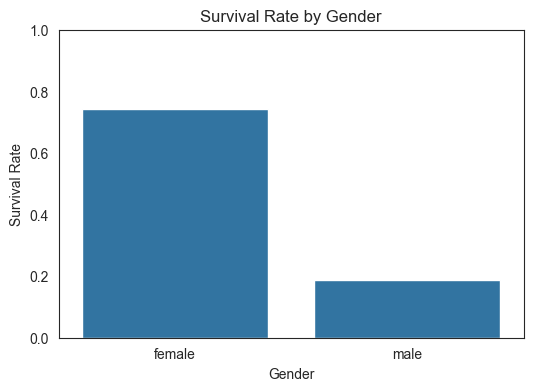

[관찰 내용]
Observation:       Sex  Survived
0  female  0.742038
1    male  0.188908
[최종 답변]
남자 승객의 생존율은 약 18.9%, 여자 승객의 생존율은 약 74.2%입니다.

아래와 같은 barplot 차트로 시각화할 수 있습니다:

- x축: 성별(Sex)
- y축: 생존율(Survival Rate)
- 남성보다 여성이 훨씬 높은 생존율을 보입니다.

코드 예시:
```python
import matplotlib.pyplot as plt
import seaborn as sns

gender_survival = df.groupby('Sex')['Survived'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=gender_survival)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.show()
```

이 코드를 실행하면 남성과 여성의 생존율 차이를 한눈에 볼 수 있는 barplot이 출력됩니다.


In [63]:
ask("남자 승객과 여자 승객의 생존율을 구한뒤 barplot 차트로 시각화 해줘")


[도구 호출]
Tool: python_repl_ast
query: # 1,2등급에 탑승한 10세 이하 어린 아이 추출
df_child = df[(df['Pclass'].isin([1,2])) & (df['Age'] <= 10)]
# 성별별 생존율 계산
gender_survival = df_child.groupby('Sex')['Survived'].mean()
gender_survival
Log: 
Invoking: `python_repl_ast` with `{'query': "# 1,2등급에 탑승한 10세 이하 어린 아이 추출\ndf_child = df[(df['Pclass'].isin([1,2])) & (df['Age'] <= 10)]\n# 성별별 생존율 계산\ngender_survival = df_child.groupby('Sex')['Survived'].mean()\ngender_survival"}`



[관찰 내용]
Observation: Sex
female    0.888889
male      1.000000
Name: Survived, dtype: float64


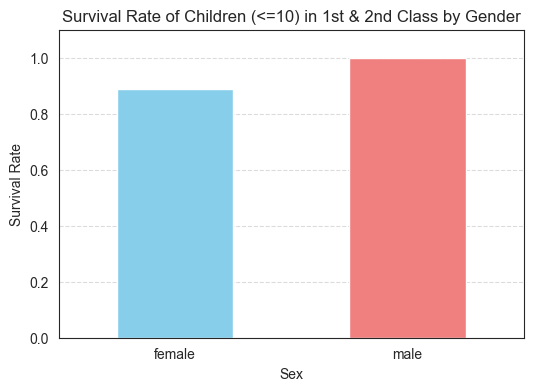

[도구 호출]
Tool: python_repl_ast
query: import matplotlib.pyplot as plt

gender_survival = df_child.groupby('Sex')['Survived'].mean()

# 시각화
plt.figure(figsize=(6,4))
gender_survival.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Survival Rate of Children (<=10) in 1st & 2nd Class by Gender')
plt.ylabel('Survival Rate')
plt.ylim(0,1.1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
Log: 
Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\n\ngender_survival = df_child.groupby('Sex')['Survived'].mean()\n\n# 시각화\nplt.figure(figsize=(6,4))\ngender_survival.plot(kind='bar', color=['skyblue', 'lightcoral'])\nplt.title('Survival Rate of Children (<=10) in 1st & 2nd Class by Gender')\nplt.ylabel('Survival Rate')\nplt.ylim(0,1.1)\nplt.xticks(rotation=0)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\nplt.show()"}`



[관찰 내용]
Observation: 
[최종 답변]
1, 2등급에 탑승한 10세 이하 어린 아이의 성별별 생존율은 다음과 같습니다.

- 남자(male): 100% (1.0)
- 여자(female

In [64]:
ask("1,2등급에 탑승한 10세 이하 어린 아이의 성별별 생존율을 구하고 시각화 하세요")


08. Toolkits 활용 Agent

In [65]:
import os

if not os.path.exists("tmp"):
    os.mkdir("tmp")


In [66]:
# FileManagementToolkit을 가져옵니다. 이 도구는 파일 관리 작업을 수행하는 데 사용됩니다.
from langchain_community.agent_toolkits import FileManagementToolkit

# 'tmp'라는 이름의 디렉토리를 작업 디렉토리로 설정합니다.
working_directory = "tmp"

# FileManagementToolkit 객체를 생성합니다.
# root_dir 매개변수에 작업 디렉토리를 지정하여 모든 파일 작업이 이 디렉토리 내에서 이루어지도록 합니다.
toolkit = FileManagementToolkit(root_dir=str(working_directory))

# toolkit.get_tools() 메서드를 호출하여 사용 가능한 모든 파일 관리 도구를 가져옵니다.
# 이 도구들은 파일 복사, 삭제, 검색, 이동, 읽기, 쓰기, 디렉토리 목록 조회 등의 기능을 제공합니다.
available_tools = toolkit.get_tools()

# 사용 가능한 도구들의 이름을 출력합니다.
print("[사용 가능한 파일 관리 도구들]")
for tool in available_tools:
    print(f"- {tool.name}: {tool.description}")


[사용 가능한 파일 관리 도구들]
- copy_file: Create a copy of a file in a specified location
- file_delete: Delete a file
- file_search: Recursively search for files in a subdirectory that match the regex pattern
- move_file: Move or rename a file from one location to another
- read_file: Read file from disk
- write_file: Write file to disk
- list_directory: List files and directories in a specified folder


In [67]:
# 도구 중 일부만 지정하여 선택하는 것도 가능합니다
tools = FileManagementToolkit(
    root_dir=str(working_directory),
    selected_tools=["read_file", "file_delete", "write_file", "list_directory"],
).get_tools()
tools


[ReadFileTool(root_dir='tmp'),
 DeleteFileTool(root_dir='tmp'),
 WriteFileTool(root_dir='tmp'),
 ListDirectoryTool(root_dir='tmp')]

In [68]:
read_tool, delete_tool, write_tool, list_tool = tools

# 파일 쓰기
write_tool.invoke({"file_path": "example.txt", "text": "Hello World!"})


'File written successfully to example.txt.'

In [69]:
# 파일 목록 조회
print(list_tool.invoke({}))


example.txt


In [70]:
# 파일 삭제
print(delete_tool.invoke({"file_path": "example.txt"}))


File deleted successfully: example.txt.


In [71]:
# 파일 목록 조회
print(list_tool.invoke({}))


No files found in directory .


In [72]:
# 필요한 모듈과 클래스를 임포트합니다.
from langchain.tools import tool
from typing import List, Dict
from langchain_teddynote.tools import GoogleNews


# 최신 뉴스 검색 도구를 정의합니다.
@tool
def latest_news(k: int = 5) -> List[Dict[str, str]]:
    """Look up latest news"""
    # GoogleNews 객체를 생성합니다.
    news_tool = GoogleNews()
    # 최신 뉴스를 검색하고 결과를 반환합니다. k는 반환할 뉴스 항목의 수입니다.
    return news_tool.search_latest(k=k)


# FileManagementToolkit을 사용하여 파일 관리 도구들을 가져옵니다.
tools = FileManagementToolkit(
    root_dir=str(working_directory),
).get_tools()

# 최신 뉴스 검색 도구를 tools 리스트에 추가합니다.
tools.append(latest_news)

# 모든 도구들이 포함된 tools 리스트를 출력합니다.
tools


[CopyFileTool(root_dir='tmp'),
 DeleteFileTool(root_dir='tmp'),
 FileSearchTool(root_dir='tmp'),
 MoveFileTool(root_dir='tmp'),
 ReadFileTool(root_dir='tmp'),
 WriteFileTool(root_dir='tmp'),
 ListDirectoryTool(root_dir='tmp'),
 StructuredTool(name='latest_news', description='Look up latest news', args_schema=<class 'langchain_core.utils.pydantic.latest_news'>, func=<function latest_news at 0x30c097c40>)]

In [73]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain.agents import create_tool_calling_agent, AgentExecutor
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_teddynote.messages import AgentStreamParser

# session_id 를 저장할 딕셔너리 생성
store = {}

# 프롬프트 생성
# 프롬프트는 에이전트에게 모델이 수행할 작업을 설명하는 텍스트를 제공합니다. (도구의 이름과 역할을 입력)
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. "
            "Make sure to use the `latest_news` tool to find latest news. "
            "Make sure to use the `file_management` tool to manage files. ",
        ),
        ("placeholder", "{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)

# LLM 생성
llm = ChatOpenAI(model="gpt-4.1")

# Agent 생성
agent = create_tool_calling_agent(llm, tools, prompt)

# AgentExecutor 생성
agent_executor = AgentExecutor(
    agent=agent,
    tools=tools,
    verbose=False,
    handle_parsing_errors=True,
)


# session_id 를 기반으로 세션 기록을 가져오는 함수
def get_session_history(session_ids):
    if session_ids not in store:  # session_id 가 store에 없는 경우
        # 새로운 ChatMessageHistory 객체를 생성하여 store에 저장
        store[session_ids] = ChatMessageHistory()
    return store[session_ids]  # 해당 세션 ID에 대한 세션 기록 반환


# 채팅 메시지 기록이 추가된 에이전트를 생성합니다.
agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    # 대화 session_id
    get_session_history,
    # 프롬프트의 질문이 입력되는 key: "input"
    input_messages_key="input",
    # 프롬프트의 메시지가 입력되는 key: "chat_history"
    history_messages_key="chat_history",
)

agent_stream_parser = AgentStreamParser()


In [74]:
result = agent_with_chat_history.stream(
    {
        "input": "최신 뉴스 5개를 검색하고, 각 뉴스의 제목을 파일명으로 가지는 파일을 생성하고(.txt), "
        "파일의 내용은 뉴스의 내용과 url을 추가하세요. "
    },
    config={"configurable": {"session_id": "abc123"}},
)

print("Agent 실행 결과:")
for step in result:
    agent_stream_parser.process_agent_steps(step)


Agent 실행 결과:
[도구 호출]
Tool: latest_news
k: 5
Log: 
Invoking: `latest_news` with `{'k': 5}`



[관찰 내용]
Observation: [{'url': 'https://news.google.com/rss/articles/CBMingFBVV95cUxOckt0ZFg2alJUWFdpN1VTaHJGcEl5dTI3b0RCaGJMSzNzTXZZeXFhVWFNTHFZTjJPYVpUeld4Ml9rWnVUZ2hWM1g1RGMwenIya2cwTUdydEhETk1IR0ZLRkZLMHp1aVhWQkZZbG1TRmdLbFBzQ1JoMmJmZ3NFT1kwZTQtNDJyT2pScFdrYURHbUtRZ3JwRE9PeWRKY0xHZ9IBsgFBVV95cUxQLUEzbGtvekpBWGtYZlR3Sk9fTUtWYU52eHdNOUZNQ2IzcVN4Zm1pb3ZrS2ljNlI2NllneGl6YjFsTE1Ra3QtQjBmbExydFdyNU84U0I1dElJVFpzcFJwdlVfQXdGZG54aWpmRXdPSkJwUTRVb3h6NS1QTF83ekRtZ2MxSGY3VG5qaWVqSUNVcExxckJVTTRPYk9YbWlJSEhTeGJRdmhGNzlNd1hkNXVKQ2dR?oc=5', 'content': '외신 “李 대통령, 젤렌스키 같은 운명 피해…칭송 후 환영받아” - 조선일보'}, {'url': 'https://news.google.com/rss/articles/CBMib0FVX3lxTFBCT0U4UHRvVVBCQi12VFh3UEpxZksyRUpTdE9iX0hiRXRmWTNBWW5nNlRLWXNWZWpyLWVhRlRhTVJaeFgzdHZySzBUUUJjc2NxNnR6bU9Za0UtNzNrSnRuY29Ub2E0SXlCMEhmT1ZUdw?oc=5', 'content': '트럼프 “‘교회 수색’ 소식 정보기관 통해 들어…오해인 듯” - 한겨레'}, {'url': 'https://news.google.com/rss/articles/CBMi

In [75]:
result = agent_with_chat_history.stream(
    {
        "input": "이전에 생성한 파일 제목 맨 앞에 제목에 어울리는 emoji를 추가하여 파일명을 변경하세요. "
        "파일명도 깔끔하게 변경하세요. "
    },
    config={"configurable": {"session_id": "abc123"}},
)

print("Agent 실행 결과:")
for step in result:
    agent_stream_parser.process_agent_steps(step)


Agent 실행 결과:
[도구 호출]
Tool: list_directory
dir_path: .
Log: 
Invoking: `list_directory` with `{'dir_path': '.'}`



[관찰 내용]
Observation: 임상·투자만큼_중요해진_'지배구조_대응',_상장_제약사_새_숙제.txt
노조_있는_협력업체는_일감_끊긴다_‘노란봉투법_괴담’_팩트체크.txt
‘법무_투톱’_박성재·심우정,_계엄_당일_윤석열_하달_‘임무’_따랐나.txt
트럼프_‘교회_수색’_소식_정보기관_통해_들어…오해인_듯.txt
외신_李_대통령,_젤렌스키_같은_운명_피해…칭송_후_환영받아.txt
[도구 호출]
Tool: move_file
source_path: 임상·투자만큼_중요해진_'지배구조_대응',_상장_제약사_새_숙제.txt
destination_path: 💊지배구조_대응_상장_제약사_이슈.txt
Log: 
Invoking: `move_file` with `{'source_path': "임상·투자만큼_중요해진_'지배구조_대응',_상장_제약사_새_숙제.txt", 'destination_path': '💊지배구조_대응_상장_제약사_이슈.txt'}`



[도구 호출]
Tool: move_file
source_path: 노조_있는_협력업체는_일감_끊긴다_‘노란봉투법_괴담’_팩트체크.txt
destination_path: 🧑‍🏭노란봉투법_팩트체크.txt
Log: 
Invoking: `move_file` with `{'source_path': '노조_있는_협력업체는_일감_끊긴다_‘노란봉투법_괴담’_팩트체크.txt', 'destination_path': '🧑\u200d🏭노란봉투법_팩트체크.txt'}`



[도구 호출]
Tool: move_file
source_path: ‘법무_투톱’_박성재·심우정,_계엄_당일_윤석열_하달_‘임무’_따랐나.txt
destination_path: ⚖️법무_투톱_계엄_윤석열_임무.txt
Log: 
Invoking: `move_file` with 

In [76]:
result = agent_with_chat_history.stream(
    {
        "input": "이전에 생성한 모든 파일을 `news` 폴더를 생성한 뒤 해당 폴더에 모든 파일을 복사하세요. "
        "내용도 동일하게 복사하세요. "
    },
    config={"configurable": {"session_id": "abc123"}},
)

print("Agent 실행 결과:")
for step in result:
    agent_stream_parser.process_agent_steps(step)


Agent 실행 결과:
[도구 호출]
Tool: list_directory
dir_path: .
Log: 
Invoking: `list_directory` with `{'dir_path': '.'}`



[관찰 내용]
Observation: ⚖️법무_투톱_계엄_윤석열_임무.txt
🇺🇸트럼프_교회_수색_오해.txt
🧑‍🏭노란봉투법_팩트체크.txt
🌍이대통령_젤렌스키_칭송.txt
💊지배구조_대응_상장_제약사_이슈.txt
[도구 호출]
Tool: list_directory
dir_path: news
Log: 
Invoking: `list_directory` with `{'dir_path': 'news'}`



[관찰 내용]
Observation: Error: [Errno 2] No such file or directory: '/Users/mypsyche/Downloads/20250814/tmp/news'
[도구 호출]
Tool: write_file
file_path: news/.keep
text: This is a placeholder file to ensure the folder exists.
Log: 
Invoking: `write_file` with `{'file_path': 'news/.keep', 'text': 'This is a placeholder file to ensure the folder exists.'}`



[관찰 내용]
Observation: File written successfully to news/.keep.
[도구 호출]
Tool: copy_file
source_path: ⚖️법무_투톱_계엄_윤석열_임무.txt
destination_path: news/⚖️법무_투톱_계엄_윤석열_임무.txt
Log: 
Invoking: `copy_file` with `{'source_path': '⚖️법무_투톱_계엄_윤석열_임무.txt', 'destination_path': 'news/⚖️법무_투톱_계엄_윤석열_임무.txt'}`



[도구 호출]

In [77]:
result = agent_with_chat_history.stream(
    {"input": "news 폴더를 제외한 모든 .txt 파일을 삭제하세요."},
    config={"configurable": {"session_id": "abc123"}},
)

print("Agent 실행 결과:")
for step in result:
    agent_stream_parser.process_agent_steps(step)


Agent 실행 결과:
[도구 호출]
Tool: file_search
pattern: *.txt
Log: 
Invoking: `file_search` with `{'pattern': '*.txt'}`



[관찰 내용]
Observation: ⚖️법무_투톱_계엄_윤석열_임무.txt
🇺🇸트럼프_교회_수색_오해.txt
🧑‍🏭노란봉투법_팩트체크.txt
🌍이대통령_젤렌스키_칭송.txt
💊지배구조_대응_상장_제약사_이슈.txt
news/⚖️법무_투톱_계엄_윤석열_임무.txt
news/🇺🇸트럼프_교회_수색_오해.txt
news/🧑‍🏭노란봉투법_팩트체크.txt
news/🌍이대통령_젤렌스키_칭송.txt
news/💊지배구조_대응_상장_제약사_이슈.txt
[도구 호출]
Tool: file_delete
file_path: ⚖️법무_투톱_계엄_윤석열_임무.txt
Log: 
Invoking: `file_delete` with `{'file_path': '⚖️법무_투톱_계엄_윤석열_임무.txt'}`



[도구 호출]
Tool: file_delete
file_path: 🇺🇸트럼프_교회_수색_오해.txt
Log: 
Invoking: `file_delete` with `{'file_path': '🇺🇸트럼프_교회_수색_오해.txt'}`



[도구 호출]
Tool: file_delete
file_path: 🧑‍🏭노란봉투법_팩트체크.txt
Log: 
Invoking: `file_delete` with `{'file_path': '🧑\u200d🏭노란봉투법_팩트체크.txt'}`



[도구 호출]
Tool: file_delete
file_path: 🌍이대통령_젤렌스키_칭송.txt
Log: 
Invoking: `file_delete` with `{'file_path': '🌍이대통령_젤렌스키_칭송.txt'}`



[도구 호출]
Tool: file_delete
file_path: 💊지배구조_대응_상장_제약사_이슈.txt
Log: 
Invoking: `file_delete` with `{'file_p

09. RAG + Image Generator Agent(보고서 작성)

In [78]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain.document_loaders import PyMuPDFLoader

# PDF 파일 로드. 파일의 경로 입력
loader = PyMuPDFLoader("data/SPRI_AI_Brief_2023년12월호_F.pdf")

# 텍스트 분할기를 사용하여 문서를 분할합니다.
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

# 문서를 로드하고 분할합니다.
split_docs = loader.load_and_split(text_splitter)

# VectorStore를 생성합니다.
vector = FAISS.from_documents(split_docs, OpenAIEmbeddings())

# Retriever를 생성합니다.
retriever = vector.as_retriever()


In [79]:
from langchain.tools.retriever import create_retriever_tool
from langchain_core.prompts import PromptTemplate

# 문서의 내용을 표시하는 템플릿을 정의합니다.
document_prompt = PromptTemplate.from_template(
    "<document><content>{page_content}</content><page>{page}</page><filename>{source}</filename></document>"
)

# retriever 를 도구로 정의합니다.
retriever_tool = create_retriever_tool(
    retriever,
    name="pdf_search",
    description="use this tool to search for information in the PDF file",
    document_prompt=document_prompt,
)


In [80]:
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from langchain.tools import tool

# DallE API Wrapper를 생성합니다.
dalle = DallEAPIWrapper(model="dall-e-3", size="1024x1024", quality="standard", n=1)


# DallE API Wrapper를 도구로 정의합니다.
@tool
def dalle_tool(query):
    """use this tool to generate image from text"""
    return dalle.run(query)


In [81]:
from langchain_community.agent_toolkits import FileManagementToolkit

# 작업 디렉토리 경로 설정
working_directory = "tmp"

# 파일 관리 도구 생성(파일 쓰기, 읽기, 디렉토리 목록 조회)
file_tools = FileManagementToolkit(
    root_dir=str(working_directory),
    selected_tools=["write_file", "read_file", "list_directory"],
).get_tools()

# 생성된 파일 관리 도구 출력
file_tools


[WriteFileTool(root_dir='tmp'),
 ReadFileTool(root_dir='tmp'),
 ListDirectoryTool(root_dir='tmp')]

In [82]:
tools = file_tools + [
    retriever_tool,
    search,
    dalle_tool,
]

# 최종 도구 목록 출력
tools


[WriteFileTool(root_dir='tmp'),
 ReadFileTool(root_dir='tmp'),
 ListDirectoryTool(root_dir='tmp'),
 Tool(name='pdf_search', description='use this tool to search for information in the PDF file', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x127303380>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x142eb86d0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page', 'page_content', 'source'], input_types={}, partial_variables={}, template='<document><content>{page_content}</content><page>{page}</page><filename>{source}</filename></document>'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x1273034c0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAI

In [83]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain.agents import create_tool_calling_agent, AgentExecutor
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_openai import ChatOpenAI
from langchain_teddynote.messages import AgentStreamParser

# session_id 를 저장할 딕셔너리 생성
store = {}

# 프롬프트 생성
# 프롬프트는 에이전트에게 모델이 수행할 작업을 설명하는 텍스트를 제공합니다. (도구의 이름과 역할을 입력)
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. "
            "You are a professional researcher. "
            "You can use the pdf_search tool to search for information in the PDF file. "
            "You can find further information by using search tool. "
            "You can use image generation tool to generate image from text. "
            "Finally, you can use file management tool to save your research result into files.",
        ),
        ("placeholder", "{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)


# LLM 생성
llm = ChatOpenAI(model="gpt-4.1")

# Agent 생성
agent = create_tool_calling_agent(llm, tools, prompt)

# AgentExecutor 생성
agent_executor = AgentExecutor(
    agent=agent,
    tools=tools,
    verbose=False,
    handle_parsing_errors=True,
)


# session_id 를 기반으로 세션 기록을 가져오는 함수
def get_session_history(session_ids):
    if session_ids not in store:  # session_id 가 store에 없는 경우
        # 새로운 ChatMessageHistory 객체를 생성하여 store에 저장
        store[session_ids] = ChatMessageHistory()
    return store[session_ids]  # 해당 세션 ID에 대한 세션 기록 반환


# 채팅 메시지 기록이 추가된 에이전트를 생성합니다.
agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    # 대화 session_id
    get_session_history,
    # 프롬프트의 질문이 입력되는 key: "input"
    input_messages_key="input",
    # 프롬프트의 메시지가 입력되는 key: "chat_history"
    history_messages_key="chat_history",
)

# 스트림 파서 생성
agent_stream_parser = AgentStreamParser()


In [84]:
# 에이전트 실행
result = agent_with_chat_history.stream(
    {
        "input": "삼성전자가 개발한 `생성형 AI` 와 관련된 유용한 정보들을 PDF 문서에서 찾아서 bullet point로 정리해 주세요. "
        "한글로 작성해주세요."
        "다음으로는 `report.md` 파일을 새롭게 생성하여 정리한 내용을 저장해주세요. \n\n"
        "#작성방법: \n"
        "1. markdown header 2 크기로 적절한 제목을 작성하세요. \n"
        "2. 발췌한 PDF 문서의 페이지 번호, 파일명을 기입하세요(예시: page 10, filename.pdf). \n"
        "3. 정리된 bullet point를 작성하세요. \n"
        "4. 작성이 완료되면 파일을 `report.md` 에 저장하세요. \n"
        "5. 마지막으로 저장한 `report.md` 파일을 읽어서 출력해 주세요. \n"
    },
    config={"configurable": {"session_id": "abc123"}},
)

print("Agent 실행 결과:")
for step in result:
    agent_stream_parser.process_agent_steps(step)


Agent 실행 결과:
[도구 호출]
Tool: pdf_search
query: 삼성전자 생성형 AI
Log: 
Invoking: `pdf_search` with `{'query': '삼성전자 생성형 AI'}`



[관찰 내용]
Observation: <document><content>SPRi AI Brief |  
2023-12월호
10
삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개
n 삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 
AI 모델 ‘삼성 가우스’를 공개
n 삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로, 온디바이스 작동이 가능한 
삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유
KEY Contents
£ 언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스, 온디바이스 작동 지원
n 삼성전자가 2023년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 
‘삼성 가우스’를 최초 공개
∙정규분포 이론을 정립한 천재 수학자 가우스(Gauss)의 이름을 본뜬 삼성 가우스는 다양한 상황에 
최적화된 크기의 모델 선택이 가능
∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며, 
온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유
∙삼성전자는 삼성 가우스를 활용한 온디바이스 AI 기술도 소개했으며, 생성 AI 모델을 다양한 제품에 
단계적으로 탑재할 계획
n 삼성 가우스는 △텍스트를 생성하는 언어모델 △코드를 생성하는 코드 모델 △이미지를 생성하는 
이미지 모델의 3개 모델로 구성
∙언어 모델은 클라우드와 온디바이스 대상 다양한 모델로 구성되며, 메일 작성, 문서 요약, 번역 업무의 
처리를 지원
∙코드 모델 기반의 AI 코딩 어시스턴트 ‘코드아이(code.i)’는 대화형 인터페이스로 서비스를 제공하며 
사내 소프트웨어 개발에 최적화
∙이미지 모델은 창

In [85]:
# 웹 검색을 통해 보고서 파일 업데이트
result = agent_with_chat_history.stream(
    {
        "input": "이번에는 삼성전자가 개발한 `생성형 AI` 와 관련된 정보들을 웹 검색하고, 검색한 결과를 정리해 주세요. "
        "한글로 작성해주세요."
        "다음으로는 `report.md` 파일을 열어서 기존의 내용을 읽고, 웹 검색하여 찾은 정보를 이전에 작성한 형식에 맞춰 뒷 부분에 추가해 주세요. \n\n"
        "#작성방법: \n"
        "1. markdown header 2 크기로 적절한 제목을 작성하세요. \n"
        "2. 정보의 출처(url)를 기입하세요(예시: 출처: 네이버 지식백과). \n"
        "3. 정리된 웹검색 내용을 작성하세요. \n"
        "4. 작성이 완료되면 파일을 `report.md` 에 저장하세요. \n"
        "5. 마지막으로 저장한 `report.md` 파일을 읽어서 출력해 주세요. \n"
    },
    config={"configurable": {"session_id": "abc123"}},
)

print("Agent 실행 결과:")
for step in result:
    agent_stream_parser.process_agent_steps(step)


Agent 실행 결과:
[도구 호출]
Tool: tavily_search_results_json
query: 삼성전자 생성형 AI 개발
Log: 
Invoking: `tavily_search_results_json` with `{'query': '삼성전자 생성형 AI 개발'}`



[관찰 내용]
Observation: [{'title': '[삼성전자 AI 리더십] ③ 사용자 경험을 최우선으로 하는 AI 전략', 'url': 'https://news.samsung.com/kr/%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90-ai-%EB%A6%AC%EB%8D%94%EC%8B%AD-%E2%91%A2-%EC%82%AC%EC%9A%A9%EC%9E%90-%EA%B2%BD%ED%97%98%EC%9D%84-%EC%B5%9C%EC%9A%B0%EC%84%A0%EC%9C%BC%EB%A1%9C-%ED%95%98%EB%8A%94', 'content': '개인의 일상을 넘어 기업에서도 생성형 AI의 활용도가 커지고 있다. 삼성전자는 AI 기술 경쟁력 확보, 민감한 사내 정보도 안전하게 사용할 수 있는 정보보호, 그리고 용도별 최적 규모와 성능의 모델 적용을 위해 자체 생성형 AI 모델을 개발했다. 이를 통해 다양한 제품과 사내·외 서비스에 최적화된 모델들을 확보하고, 더욱 안전한 환경에서 사내 생산성 향상을 지원하고 있다.\n\n최근 삼성전자는 자체 생성형 AI 모델 ‘삼성 가우스2(Samsung Gauss2)’를 공개했다. 삼성 가우스2는 지난해 처음 공개한 ‘삼성 가우스1’에서 성능과 효율성을 강화한 후속 모델이며, 여러 가지 유형의 데이터를 동시에 처리할 수 있는 멀티모달(Multimodal)( 모델로 확장됐다. [...] 이처럼 삼성전자는 온디바이스 AI와 클라우드 AI를 아우르는 운영 기술, 다방면에 활용되는 생성형 AI를 발전시키고 있다. 특히 모바일, TV, 가전 등 다양한 제품군을 기반으로 차별화된 AI 경쟁력을 갖추고 있다.\n\n삼성전자는 제품이라

In [86]:
# 보고서 작성을 요청합니다.
result = agent_with_chat_history.stream(
    {
        "input": "`report.md` 파일을 열어서 안의 내용을 출력하세요. "
        "출력된 내용을 바탕으로, 전문적인 수준의 보고서를 작성하세요. "
        "보고서는 총 3개의 섹션으로 구성되어야 합니다:\n"
        "1. 개요: 보고서 abstract 를 300자 내외로 작성하세요.\n"
        "2. 핵심내용: 보고서의 핵심 내용을 작성하세요. 정리된 표를 markdown 형식으로 작성하여 추가하세요. "
        "3. 최종결론: 보고서의 최종 결론을 작성하세요. 출처(파일명, url 등)을 표시하세요."
        "마지막으로 작성된 결과물을 `report-2.md` 파일에 저장하세요."
    },
    config={"configurable": {"session_id": "abc123"}},
)

print("Agent 실행 결과:")
for step in result:
    agent_stream_parser.process_agent_steps(step)


Agent 실행 결과:
[도구 호출]
Tool: read_file
file_path: report.md
Log: 
Invoking: `read_file` with `{'file_path': 'report.md'}`



[관찰 내용]
Observation: ## 삼성전자가 개발한 생성형 AI 관련 주요 정보

- (page 10, 12, SPRI_AI_Brief_2023년12월호_F.pdf)

- 삼성전자는 자체 개발 생성 AI 모델 '삼성 가우스'를 2023년 11월 8일 '삼성 AI 포럼 2023'에서 최초 공개함.
- '삼성 가우스'는 정규분포 이론을 정립한 수학자 가우스(Gauss)의 이름을 본따 명명되었으며, 다양한 상황에 최적화된 크기의 모델 선택이 가능함.
- 삼성 가우스는 언어모델, 코드 모델, 이미지 모델의 3개 모델로 구성됨.
    - 언어 모델: 클라우드 및 온디바이스 대상, 메일 작성, 문서 요약, 번역 등의 업무를 지원
    - 코드 모델: AI 코딩 어시스턴트 '코드아이(code.i)'로 제공되며, 대화형 인터페이스 기반 사내 소프트웨어 개발에 최적화
    - 이미지 모델: 창의적 이미지 생성, 기존 이미지 변환, 저해상도->고해상도 전환 지원
- 온디바이스에서 작동 가능하여 외부로 사용자 정보가 유출될 위험이 없음.
- 삼성전자는 이 생성형 AI 모델을 다양한 제품에 단계적으로 탑재할 계획임.
- IT 전문지 TechRepublic은 온디바이스 AI가 2024년 주요 기술 트렌드가 될 것으로 전망하며, 삼성 가우스를 탑재한 기기가 메타의 Llama2를 탑재한 퀄컴, 구글 어시스턴트를 적용한 픽셀 등과 경쟁할 것으로 보도함.
- 삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었음.
- 출처: 삼성전자, ‘삼성 AI 포럼’ 자체 개발 생성형 AI ‘삼성 가우스’ 공개, 2023.11.08., SPRI_AI_Brief_2023년12월호_F.pdf, TechRepublic 보도 요약.


## 삼성전자의 

In [87]:
# 이미지 생성을 요청합니다.
result = agent_with_chat_history.stream(
    {
        "input": "`report-2.md` 파일을 열어서 안의 내용을 출력하세요. "
        "출력된 내용에 어울리는 이미지를 생성하세요. "
        "생성한 이미지의 url 을 markdown 형식으로 보고서의 가장 상단에 추가하세요. "
        "마지막으로 작성된 결과물을 `report-3.md` 파일에 저장하세요."
    },
    config={"configurable": {"session_id": "abc123"}},
)

print("Agent 실행 결과:")
for step in result:
    agent_stream_parser.process_agent_steps(step)


Agent 실행 결과:
[도구 호출]
Tool: read_file
file_path: report-2.md
Log: 
Invoking: `read_file` with `{'file_path': 'report-2.md'}`



[관찰 내용]
Observation: ## 개요

본 보고서는 삼성전자가 개발한 생성형 AI 기술의 주요 내용, 발전 현황 및 전략적 방향성에 대해 분석한다. 최근 삼성전자는 자체 개발한 생성형 AI 모델 '삼성 가우스'와 차세대 멀티모달 모델 '가우스2'를 다양한 산업 영역에 적용함으로써 AI 시장에서의 리더십을 강화하고 있다. 본 보고서는 해당 기술의 구조, 적용 현황, 경쟁력, 그리고 윤리·보안 측면까지 종합적으로 정리하고, 삼성 AI의 미래 동향과 시사점을 제시한다.

## 핵심내용

삼성전자의 생성형 AI는 자사 제품에 특화된 다양한 형태로 개발되고 있다. 온디바이스 기반 AI 도입으로 개인정보 보호 및 처리 효율을 높이고 있으며, 외부 AI와의 전략적 병행 활용, 비용 절감, 기업용 AI 확산 등으로 차별화된 경쟁력을 확보하는 중이다.

| 구분       | 주요 내용                                                         | 특징 및 장점   |
|:----------|:---------------------------------------------------------------------|:-------------|
| AI 모델   | 삼성 가우스, 가우스2 (언어, 코드, 이미지, 멀티모달)                       | 자체개발, 다양한 크기, 멀티모달 처리 |
| 적용 분야 | 갤럭시 S24, 빅스비, 가전제품, 삼성SDS B2B 등                              | 내부·외부 연동, 단계별 확대 적용 |
| AI 전략   | 온디바이스·클라우드 병행, 외부 AI 하이브리드 도입, 자체 교육 데이터 활용      | 개인정보 및 보안